## 딥러닝

### 인공신경망

#### Tensorflow
- https://www.tensorflow.org/?hl=ko
- 딥러닝 라이브러리 중 가장 유명
- 구글 브레인팀에서 개발

#### PyTorch
- https://pytorch.org/
- https://pytorch.kr/
- 메타(페이스북)에서 개발한 딥러닝 라이브러리
- GPU 사용이 매우 용이해서 빨리 처리가능

#### MNIST 데이터
- AI에서 많이 사용하는 데이터셋 중 하나
- 미국 국립표준기술연구소에서 배포하는 이미지 데이터
- 손글씨(0~9), 붓꽃데이터, 패션데이터, Cifar10(컬러 이미지)등 존재

Fashion MNIST

In [1]:
# 텐서플로우 사용
from tensorflow import keras

Matplotlib is building the font cache; this may take a moment.


In [2]:
# 패션MNIST를 로드하면서 훈련 세트와 테스트 세트로 분리
# sklearn train_test_split()와 변수 배치가 다름!
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# 60000개 이미지 데이터, 넓이 28픽셀, 높이 28픽셀
train_input.shape

(60000, 28, 28)

In [4]:
# 60000개 이미지에 대한 분류값
train_target.shape

(60000,)

#### 이미지 시각화

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
# 한글로 Matplotlib 사용시 항상 필요
from matplotlib import rcParams, font_manager, rc

font_path = 'C:/Windows/Fonts/malgun.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
rcParams['axes.unicode_minus'] = False

sns.set_style('darkgrid')
sns.set_theme(font='Malgun Gothic', rc={'axes.unicode_minus': False})

FileNotFoundError: [Errno 2] No such file or directory: '/Users/hyeonho/Documents/GitHub/iot-dataanalysis-2025/day04/C:/Windows/Fonts/malgun.ttf'

/Users/hyeonho/.pyenv/versions/3.11.9/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54984 (\N{HANGUL SYLLABLE HUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hyeonho/.pyenv/versions/3.11.9/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47144 (\N{HANGUL SYLLABLE RYEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hyeonho/.pyenv/versions/3.11.9/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49368 (\N{HANGUL SYLLABLE SAEM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hyeonho/.pyenv/versions/3.11.9/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54540 (\N{HANGUL SYLLABLE PEUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


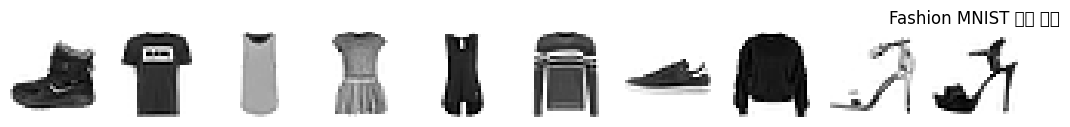

In [7]:
# 10개 차트 그리기
fig, axes = plt.subplots(1, 10, figsize=(13, 2))
for i in range(10):
    axes[i].imshow(train_input[i], cmap='gray_r')
    axes[i].axis('off')

plt.title('Fashion MNIST 훈련 샘플')
plt.show()

- 이미지는 픽셀당 흑백은 1byte, 컬러는 3~4bytes를 사용
- 해상도가 커지면 이미지 파일 사이즈가 기하급수적으로 증가
- 28x28 정도로 제한

In [8]:
#
[train_target[i] for i in  range(10)]

[np.uint8(9),
 np.uint8(0),
 np.uint8(0),
 np.uint8(3),
 np.uint8(0),
 np.uint8(2),
 np.uint8(7),
 np.uint8(2),
 np.uint8(5),
 np.uint8(5)]

| 레이블 | 0     | 1    | 2     | 3     | 4    | 5     | 6     | 7        | 8    | 9        |
|:------:|:-----:|:----:|:-----:|:-----:|:----:|:-----:|:-----:|:--------:|:----:|:--------:|
| 패션MNIST | 티셔츠 | 바지 | 스웨터 | 드레스 | 코트 | 샌달 | 셔츠 | 스니커즈 | 가방 | 앵클부츠 |


In [9]:
# 60000개 데이터에서 각 레이블 별 6000개씩 이미지가 존재
np.unique(train_target, return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

#### 사이킷런 머신러닝, 로지스틱회귀로 아이템 분류

In [10]:
# 사이킷런 모듈 로드
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split    ## 이거 필요없음

##### 이미지처리
- 28 x 28 2차원 배열을 784 1차원 배열로 변경해줘야 함

    <img src='../image/ml0009.png' width='500'>



In [11]:
# 2D 이미지를 1D 벡터(1차원 배열)로 펼치기
train_input = train_input.reshape(-1, 28*28)

In [12]:
train_input.shape

(60000, 784)

In [13]:
test_input = test_input.reshape(-1, 28*28)

In [14]:
test_input.shape

(10000, 784)

In [15]:
# 스케일링(정규화)
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_input.astype(np.float64))
test_scaled = scaler.fit_transform(test_input.astype(np.float64))

In [16]:
# 로지스틱 회귀 모델
lr = LogisticRegression(C = 20, max_iter=1000)
lr

LogisticRegression(C=20, max_iter=1000)

In [17]:
# 훈련
lr.fit(train_scaled, train_target)

/Users/hyeonho/.pyenv/versions/3.11.9/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=20, max_iter=1000)

In [18]:
lr.score(train_scaled, train_target)

0.8877333333333334

In [19]:
# 정확도
lr.score(test_scaled, test_target)

0.8317

In [20]:
# 예측
pred_result = lr.predict(test_scaled)

In [21]:
# 테스트 이미지와 예측결과 시각화
def show_image(index):
    plt.figure(figsize=(2,2))
    plt.imshow(test_input[index].reshape(28, 28), cmap='gray_r')
    plt.title(f'실제: {test_target[index]}, 예측: {pred_result[index]}')
    plt.axis('off')
    plt.show()

/Users/hyeonho/.pyenv/versions/3.11.9/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hyeonho/.pyenv/versions/3.11.9/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hyeonho/.pyenv/versions/3.11.9/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hyeonho/.pyenv/versions/3.11.9/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


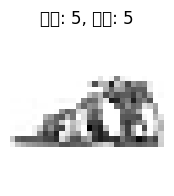

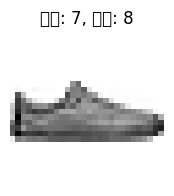

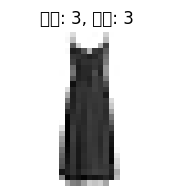

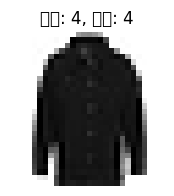

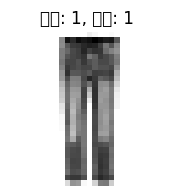

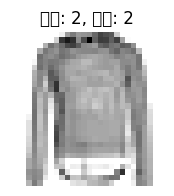

In [22]:
for i in range(11, 17):
    show_image(i)

- 여기까지 머신러닝으로 처리

#### 인공신경망

- 인간의 뇌 속 뉴런과 유사한 구조로 만든 것
- 인공신경망을 이용해서 머신러닝 훈련과 테스트, 예측 등을 수행하는 것
- 인공지능 ⊃ 머신러닝 ⊃ 딥러닝(인공신경망)
- 정확도가 높아서 딥러닝 가장 많이 사용(트렌드)

<img src='../image/ml0010.png' width='700'>

In [23]:
# 텐서플로우 모듈 로드
import tensorflow as tf
from tensorflow import keras

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
# train_test_split() 함수로 기존 훈련세트를 훈련세트:검증세트 8:2로 분리
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

In [26]:
train_scaled.shape

(48000, 784)

- 기존 훈련 세트 -> 60000
- 새 훈련 세트 -> 48000
- 검증 세트 -> 12000

- 밀집층(Dense layer)
    - 784픽셀(28*28)을 10개(분류된 아이템 개수) 뉴런을 연결하면 7840개 연결선이 만들어짐

In [30]:
# 매개변수
## 10 출력값(아이템 0~9)
## activation 활성화함수 : softmax, sigmoid, ReLU...
## 입력크기 : 28*28
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784, ))

In [32]:
model = keras.Sequential(dense)

TypeError: 'Dense' object is not iterable

In [ ]:
# 훈련전 설정
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [ ]:
# 훈련
model.fit(train_scaled, train_target, epochs=1000)

Epoch 1/1000
1500/1500 [==============================] - 1s 841us/step - loss: 0.4211 - accuracy: 0.8631
Epoch 2/1000
1500/1500 [==============================] - 1s 829us/step - loss: 0.4201 - accuracy: 0.8626
Epoch 3/1000
1500/1500 [==============================] - 1s 789us/step - loss: 0.4197 - accuracy: 0.8631
Epoch 4/1000
1500/1500 [==============================] - 1s 787us/step - loss: 0.4185 - accuracy: 0.8634
Epoch 5/1000
1500/1500 [==============================] - 1s 817us/step - loss: 0.4187 - accuracy: 0.8625
Epoch 6/1000
1500/1500 [==============================] - 1s 824us/step - loss: 0.4179 - accuracy: 0.8645
Epoch 7/1000
1500/1500 [==============================] - 1s 852us/step - loss: 0.4183 - accuracy: 0.8639
Epoch 8/1000
1500/1500 [==============================] - 1s 875us/step - loss: 0.4151 - accuracy: 0.8651
Epoch 9/1000
1500/1500 [==============================] - 1s 819us/step - loss: 0.4167 - accuracy: 0.8648
Epoch 10/1000
1500/1500 [=====================

In [ ]:
# 검증
model.evaluate(val_scaled, val_target)

#### 결론
- 딥러닝 : 인공신경망, 생물학적 뉴런에서 영감을 받아 만든 머신러닝 알고리즘
    - 이미지, 음성, 텍스트, 영상 분야에 뛰어난 성능 발휘
- 밀집층 : Dense Layer. 가장 간단한 인공신경망
- 원-핫 인코딩 : 해당 요소만 1로 나머지는 0으로 변환하는 방식
    - [1, 0, 0, 0, 0, 0, 0, 0, 0, 0] - 티셔츠
    - [0, 0, 0, 0, 0, 0, 1, 0, 0, 0] - 스니커즈